In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# interpolate

In [2]:
'''
function of both exterpolate and interpolate, exterpolation use polyfit. 
input: 
    x: the independent variable
    y: the dependent variable 
    v: new independent variable
    kind: method of interpolation, default is linear
output:
    w: new dependent variable in new x-axis
'''
from scipy.interpolate import interp1d,UnivariateSpline
def Interp(x,y,v,kind='linear'):
    i_max=np.where(v>x.max())
    i_min=np.where(v<x.min())
    y_min=np.where(y==y.min())[0][0]
    i_between=np.where(np.all([v<=x.max(),v>=x.min()],axis=0))
    w=np.zeros(len(v))
    f_min=np.polyfit([x[0],x[y_min]],[y[0],y[y_min]],1)
    f_max=np.polyfit([x[y_min],x[-1]],[y[y_min],y[-1]],1)
    if kind == 'linear':
        f_between=interp1d(x,y,kind='linear')
    if kind == 'cubic spline':
        f_between=UnivariateSpline(x,y,k=3,s=0)
    w[i_min]=f_min[0]*v[i_min]+f_min[1]
    w[i_between]=f_between(v[i_between])
    w[i_max]=f_max[0]*v[i_max]+f_max[1]
    return w

In [33]:
# -----------------define an example of function -------------
def f(x):
    return np.sin(2*np.pi*x)
#------------------example values----------------------------
# x_obs,and y_obs: true value of the 9 initial points 
# x_grid: 1025 grid points 
# y_true: true value of f(x) on 1025 grid points
x_obs=np.linspace(0,1,9)
y_obs=f(x_obs)
x_grid=np.linspace(0,1,1025)
y_true=f(x_grid)

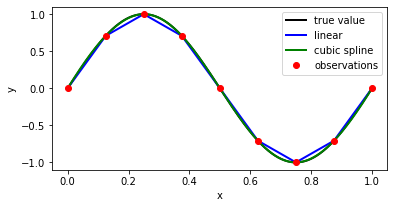

In [29]:
#-----example-------
plt.figure(figsize=[6,3])
plt.plot(x_grid,y_true,'k',linewidth=2,label='true value')
plt.plot(x_grid,Interp(x_obs,y_obs,x_grid,'linear'),'b',linewidth=2,label='linear')
plt.plot(x_grid,Interp(x_obs,y_obs,x_grid,'cubic spline'),'g',linewidth=2,label='cubic spline')
plt.plot(x_obs,y_obs,'ro',label='observations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# integral

In [18]:
'''
function to calculate the integral
    input: 
        f: the integrands
        [a,b]: the interval
        step: the integral step
    output:
        the integral result
'''
def integral(f,a,b,step):
    if a>b: # make sure a<b, raise error if the interval is zero
        a,b = b,a
    elif a == b:  
        raise ValueError ('a should not be equal to b!')
    intg_start = np.linspace(a,b,step+1)[:-1] # this is the value of every split start
    intg_end = np.linspace(a,b,step+1)[1:]
    intg_step = intg_end[0]-intg_start[0] # this is the step of every new interval
    intg_result = intg_step*(f(intg_start)+f(intg_end))/2.
    return intg_result.sum()

In [22]:
#-----------------------an example: sin function------------
true_value = 2. 
f=np.sin
a=0.
b=np.pi
step=int(1000)
error=np.zeros(step)
steps=np.linspace(1,step,step,dtype='int')
h=(b-a)/steps   # step size
for i in range(step):
    error[i]=np.abs(true_value-integral(f,a,b,steps[i]))
print ('the result of the integral is about:',integral(f,a,b,steps[-1]))

the result of the integral is about: 1.9999983550656626


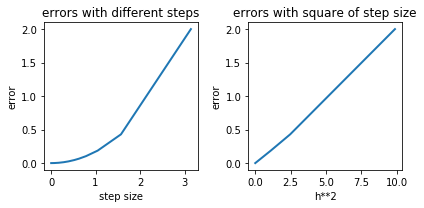

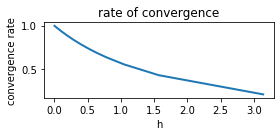

In [32]:
#----------------------analysis the error---------------------
plt.figure(figsize=[6,3])
plt.subplot(1,2,1)
plt.plot(h,error,linewidth=2)
plt.title('errors with different steps')
plt.xlabel('step size')
plt.ylabel('error')
plt.subplot(1,2,2)
plt.plot(h**2,error,linewidth=2)
plt.title('errors with square of step size')
plt.xlabel('h**2')
plt.ylabel('error')
plt.tight_layout()
plt.figure(figsize=[4,2])
plt.plot(h[:-1],error[1:]/error[:-1],linewidth=2)
plt.title('rate of convergence')
plt.xlabel('h')
plt.ylabel('convergence rate')
plt.tight_layout()

# solve equation

In [62]:
'''
The function of solving nonlinear equations:
input: 
    f: function to solve the equation
    a&b: two points you choose, the sign of f(a) and f(b) should be opposite
    error: the judgement of approximate solution
    method: could choose from 'Bisecition' or 'FalsePosition'
    record: record every step of a,b,and midpoint c
output:
    if record==True:
        an,bn,cn: a,b,c of each steps
    if record==False:
        c: the numerical solution
The precision of the funciton is double, the only default precision in python.
Wandi Yu
03.28.2016
'''
def solve_ne(f,a,b,error,method='Bisection',record=True):
    an=[]
    bn=[]
    cn=[]
    if f(a)*f(b)>0:                     # raise error when f(a)*f(b)>0
        raise ValueError('f(a) and f(b) should be in opposite sign')
    if a==b:                            # raise error when a==b
        raise ValueError('a and b should not be equal')
    for i in range(10**6):
        if method=='Bisection':
            c=(a+b)/2
        if method=='FalsePosition':
            c=a-(b-a)*f(a)/(f(b)-f(a))
        if record==True:
            an.append(a)
            bn.append(b)
            cn.append(c)
        if f(c)*f(a)<0:
            b=c
        else:
            a=c        
        if abs(f(c))<error:             # return solution when f(c) is small enough
            if record==True:
                return an,bn,cn
            else:
                return c
    raise ValueError('too much loops: no solution or too large interval')  
                                        # raise error when no solution found after 1e6 steps

Text(0, 0.5, 'f(x)')

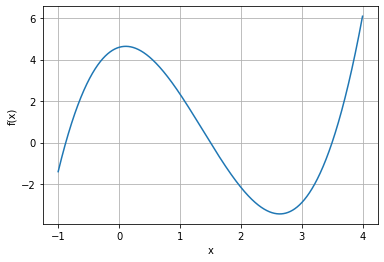

In [63]:
#------------------an example------------------------------
def f(x):
    return x**3-132/32*x**2+28/32*x+147/32
xs=np.linspace(-1,4,10000)
plt.plot(xs,f(xs))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

we can find three approximate solutions in the plot:

1. between -1 to 0
2. between 1 to 2
3. between 3 to 4


In [64]:
# -----------------------calculate using two methods----------------
error=1e-6
a1=-1.02
b1=0.
anb1,bnb1,cnb1=solve_ne(f,a1,b1,error,method='Bisection')
anf1,bnf1,cnf1=solve_ne(f,a1,b1,error,method='FalsePosition')

a2=0.99
b2=2.02
anb2,bnb2,cnb2=solve_ne(f,a2,b2,error,method='Bisection')
anf2,bnf2,cnf2=solve_ne(f,a2,b2,error,method='FalsePosition')

a3=3.
b3=4.02
anb3,bnb3,cnb3=solve_ne(f,a3,b3,error,method='Bisection')
anf3,bnf3,cnf3=solve_ne(f,a3,b3,error,method='FalsePosition')

In [65]:
print ('bisection method to solve f in [-1,0]' )
print ('{0:10s} {1:18s} {2:19s}  {3:20s}  {4:20s} '.format(\
    'n','an','bn','cn=(an+bn)/2','f(cn)'))
for i in range(10):
    print ('{0:2d} {1:18} {2:19}  {3:20}  {4:21}'.format(\
    i+1,anb1[i],bnb1[i],cnb1[i],f(cnb1[i])))

bisection method to solve f in [-1,0]
n          an                 bn                   cn=(an+bn)/2          f(cn)                
 1              -1.02                 0.0                 -0.51     2.9419364999999997
 2              -1.02               -0.51                -0.765             1.06262475
 3              -1.02              -0.765   -0.8925000000000001   -0.18390848437500118
 4 -0.8925000000000001              -0.765   -0.8287500000000001     0.4662266660156238
 5 -0.8925000000000001 -0.8287500000000001   -0.8606250000000001     0.1479733806152339
 6 -0.8925000000000001 -0.8606250000000001   -0.8765625000000001  -0.016251834869386528
 7 -0.8765625000000001 -0.8606250000000001           -0.86859375    0.06628818405532844
 8 -0.8765625000000001         -0.86859375   -0.8725781250000001   0.025125217147349055
 9 -0.8765625000000001 -0.8725781250000001   -0.8745703125000002   0.004463475497422209
10 -0.8765625000000001 -0.8745703125000002   -0.8755664062500002  -0.005887480

# differential equations


In [100]:
'''
class SBR: 
build a solid body rotation model and solve ordinary differencial equations of that model 
methods: Euler and fourth-order Runge-Kutta method. 
Wandi Yu
03.18.2016
'''
class SBR(object):                          # class of solid body rotation
    def __init__(self,x0,y0,omega=np.pi):   # x0,y0: original x,y; omega: angular velocity
        self.x=x0
        self.y=y0
        self.x0=x0
        self.y0=y0
        self._xs=[x0]                       # store values of x 
        self._ys=[y0]                       # store values of y
        self.omega=omega 
        self.lex=0                          # local error of x
        self.ley=0                          # local error of y
        self._lexs=[0]                      # store local error of x
        self._leys=[0]                      # store local error of y
        self.gex=0                          # global error of x
        self.gey=0                          # global error of y
        self._gexs=[0]                      # store global error of x
        self._geys=[0]                      # store global error of y
    def dxdt(self,x,y):                     # calculate Vx                        
        return -self.omega*y
    def dydt(self,x,y):                     # calculate Vy
        return self.omega*x    
    def anly_result(self,t0,tn,x0,y0):      # calculate analytical result a(t)
        r=np.sqrt(x0**2+y0**2)              # radius of solid body rotation
        cos0=x0/r                           # cos of original position angel
        sin0=y0/r                           # sin of original position angel
        x_a=r*(np.cos((tn-t0)*self.omega)*cos0-\
            np.sin((tn-t0)*self.omega)*sin0)# r*cos(omega*(tn-t0+t0))
        y_a=r*(np.sin((tn-t0)*self.omega)*cos0+\
            np.cos((tn-t0)*self.omega)*sin0)
        return x_a,y_a      
    def store(self):                        # function of storage
        self._xs.append(self.x)
        self._ys.append(self.y)
        self._lexs.append(self.lex)
        self._leys.append(self.ley)
        self._gexs.append(self.gex)
        self._geys.append(self.gey)
    def Euler(self,h,x0,y0):                # one step of first order Euler method
        x=x0+h*self.dxdt(x0,y0)
        y=y0+h*self.dydt(x0,y0)
        return x,y
    def RK4(self,h,x0,y0):                  # one step of fourth order Runge-Kutta method
        k1x=h*self.dxdt(x0,y0)
        k1y=h*self.dydt(x0,y0)
        x=x0+k1x/2.     
        y=y0+k1y/2.
        k2x=h*self.dxdt(x,y)
        k2y=h*self.dydt(x,y)
        x=x0+k2x/2.
        y=y0+k2y/2.
        k3x=h*self.dxdt(x,y)
        k3y=h*self.dydt(x,y)
        x=x0+k3x
        y=y0+k3y
        k4x=h*self.dxdt(x,y)
        k4y=h*self.dydt(x,y)
        x=x0+(k1x+2*k2x+2*k3x+k4x)/6.
        y=y0+(k1y+2*k2y+2*k3y+k4y)/6.
        return x,y
    def forward(self,t0,tn,steps,method,store=True): # forward function of solving ODE
        h=(tn-t0)/steps
        t=np.linspace(t0,tn,steps+1)[1:]
        x_a=self.x0                                  # x_a: accurate value of x 
        y_a=self.y0
        if method=='rk4':
            f=self.RK4
        if method=='euler':
            f=self.Euler
        for i in range(int(steps)):
            x_af,y_af=self.anly_result(t[i-1],t[i],self.x,self.y)
            # x_af, y_af is the 'analytical' result that regard x[i-1] as initial state
            self.x,self.y=f(h,self.x,self.y)         # self.x: numerical value on ti             
            x_a,y_a=self.anly_result(t0,t[i],self.x0,self.y0)           
            self.gex=x_a-self.x                      # global error
            self.gey=y_a-self.y
            self.lex=x_af-self.x                     # local error 
            self.ley=y_af-self.y
            if store==True:
                self.store()
 

In [101]:
#-----------examples-----------------
x0=1.
y0=0.
t0=0.
tn=2.
step0=100
t=np.linspace(t0,tn,step0+1)

In [102]:
test1=SBR(x0,y0)
test1.forward(t0,tn,step0,method='euler')
test2=SBR(x0,y0)
test2.forward(t0,tn,step0,method='rk4')
anly_x,anly_y=test2.anly_result(t0,t,x0,y0)

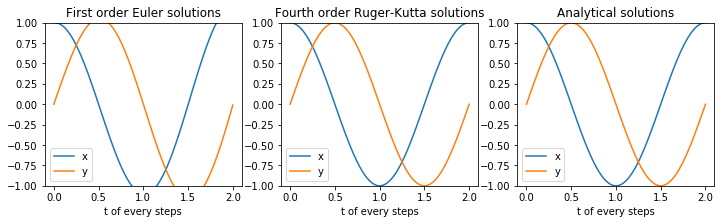

In [105]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=[12,3])
ax1.plot(t,test1._xs,label='x')
ax1.plot(t,test1._ys,label='y')
ax1.set_ylim([-1,1])
ax1.set_xlabel('t of every steps')
#ax1.set_ylabel('x and y')
ax1.set_title('First order Euler solutions')
ax1.legend()
ax2.plot(t,test2._xs,label='x')
ax2.plot(t,test2._ys,label='y')
ax2.set_ylim([-1,1])
ax2.set_xlabel('t of every steps')
#ax2.set_ylabel('x and y')
ax2.set_title('Fourth order Ruger-Kutta solutions')
ax2.legend()
ax3.plot(t,anly_x,label='x')
ax3.plot(t,anly_y,label='y')
ax3.set_ylim([-1,1])
ax3.set_xlabel('t of every steps')
#ax3.set_ylabel('x and y')
ax3.set_title('Analytical solutions')
ax3.legend()


# multivariate least square linear fitting and using fourier basic function to find the fit

In [155]:
class least_square():
    def __init__(self):
        self.X = 0             # dependent variable
        self.y = 0             # independent variable
        self.intercept = 0     # intercept of the fit
        self.coef = 0          # coefficent of the fit 
        self.predict = 0       # the predict value of the fit 
    def fit(self,A,y):   
    # find out the linear fit for A and y
    # A: independent variable, first dimension must be the same as y
    # y: dependent variable
        self.X = A
        self.y = y
        Y = self.y[:,np.newaxis]
        out = np.squeeze(np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,Y)))
        self.intercept, self.coef = out[0],out[1:]
        self.predict = np.dot(A,np.append(f.intercept,f.coef))
    def fourier_fit(self,t,y,degree=2):
    # using fourier basic functions to find out the fit
    # t: independent variable
    # y: dependent variable
    # degree: degree of fourier fitting, default = 2
        A=np.zeros([len(t),degree*2+1])
        A[:,0]=1
        for i in range(degree):
            A[:,1+i*2]=np.cos(2*(i+1)*np.pi*t)
            A[:,2+i*2]=np.sin(2*(i+1)*np.pi*t)
        Y=y[:,np.newaxis]
        self.fit(A,y)

In [162]:
#------------------an example -----------------------------------
# -------read data---------------
data_name = '/sn2/wyu/python_for_atmo/example2.txt'
header = 1
data = open(data_name)
read_data = data.read().split('\n')
data_len = len(read_data)-header
data_column = len(read_data[header].split())
f = np.zeros([data_column,data_len])
for i in range(data_len):
    arr = [float(i) for i in read_data[i+header].split()]
    if len(arr):
        f[:,i] = arr
column_name = read_data[header-1].split()
t,y = f

In [163]:
f = least_square()
f.fourier_fit(t,y,2)

Text(0.5, 1.0, 'raw data and approximation function')

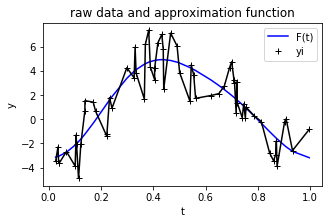

In [164]:
plt.figure(figsize=([5,3]))
plt.plot(t,f.predict,'b',linewidth=1.5,label='F(t)')
#plt.plot(t,f(t),label='f(t)')
plt.plot(t,y,'k+',label='yi')
plt.plot(t,y,'k')
plt.legend(loc=0)
plt.xlabel('t')
plt.ylabel('y')
plt.title('raw data and approximation function')

# filter 

In [144]:
'''
class fourier_filter:
    the class to calculate the fourier filter, can calculate lowpass and highpass filter
    input: 
        x, y: the independent and dependent variables
    functions: 
        cal_fft: calculate the fast fourier transform of y
        window: calculate the window when doing the filter
            two types of window function are provided: rectangular, and hanning 
        f_filter: the function we really use to filter
            input: 
                method: lowpass or highpass
                judgement: the judgement to choose the spectra
                window: the window function to filter
        draw_power_spectra: draw out the power spectra to define the judgement 
05.01.2016 
Wandi Yu
'''
class fourier_filter():
    def __init__(self,x,y):
        if len(x)!=len(y):
            raise ValueError ("x and y should be in the same length")
        self.x = x               # independent variable
        self.y = y               # dependent variable
        self.datalen = len(x)    # length of data
        self.y_FT = 0            # y after calculating fft
        self.xf = 0              # frequency of y_FT
        self.xp = 0              # positive part of xf
        self.f_ps = 0            # power spectra of y_FT
    def cal_fft(self):               # function to calculate the fft 
        self.y_FT=np.fft.fft(self.y)
        self.xf=np.fft.fftfreq(int(self.datalen),1/self.datalen)
        xp=np.where(self.xf>=0)[0]
        self.f_ps=np.sqrt(self.y_FT.real[xp]**2+self.y_FT.imag[xp]**2)
        self.xp = self.xf[xp]
    def draw_power_spectra(self):
        self.cal_fft()
        xp_sort=np.argsort(self.xp)
        plt.plot(self.xp[xp_sort],self.f_ps[xp_sort])
        plt.xlabel('k',fontsize=20)
        plt.ylabel('power spectra',fontsize=20)
    def window(self,x,judgement,method='lowpass',window = 'rectangular'):
        # function to calculate the judgement window
        if method == 'lowpass':
            low_judge=np.where(abs(x)<judgement)
        if method == 'highpass':
            low_judge=np.where(abs(x)>judgement)
        y=np.zeros(len(x))
        if window == 'hanning':
            y[low_judge] = 1./2*(1+np.cos(x*np.pi/judgement))[low_judge]
        if window == 'rectangular':
            y[low_judge]=1
        return y
    def f_filter(self,method = 'lowpass',judgement = None,window = 'rectangular'):   
        # function to filter
        #self.cal_fft()
        if not judgement:            # mean+std as the judgement if not defined
            judgement = np.mean(self.f_ps)+np.std(self.f_ps)
            print ('now the judgement value is {}'.format(str(judgement)))
        return np.fft.ifft(self.y_FT*self.window(self.xf,judgement,method,window))

In [14]:
# -------read data---------------
data_name = '/sn2/wyu/python_for_atmo/example.txt'
header = 3
data = open(data_name)
read_data = data.read().split('\n')
data_len = len(read_data)-header
data_column = len(read_data[header].split())
f = np.zeros([data_column,data_len])
for i in range(data_len):
    arr = [float(i) for i in read_data[i+header].split()]
    if len(arr):
        f[:,i] = arr
column_name = read_data[header-1].split()
i,t,f = f

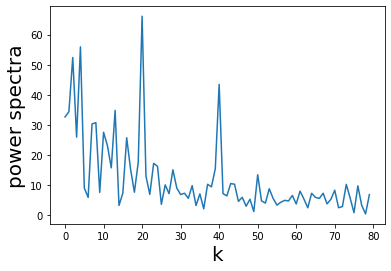

In [145]:
fft_filter = fourier_filter(t,f)
fft_filter.draw_power_spectra()


now the judgement value is 24.81985508129013


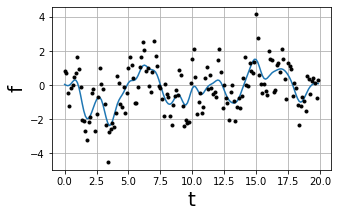

In [150]:
# an example: using the default judgement 
plt.figure(figsize=[5,3])
y_filtered = fft_filter.f_filter('lowpass',window='hanning')
plt.plot(t,y_filtered.real,label='smoothed data')
plt.plot(t,f,'k.',label='raw data')
plt.xlabel('t',fontsize=20)
plt.ylabel('f',fontsize=20)
plt.grid()
